<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/practice/HOML_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Read mnist data

In [13]:
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
X, y = mnist["data"], mnist["target"]

In [15]:
X.shape

(70000, 784)

So we have 70000 images of handwritten digits with 784 bits pixel bits from each image

In [ ]:
y.shape

(70000,)

In [ ]:
y[:5]

,class
0,5
1,0
2,4
3,1
4,9


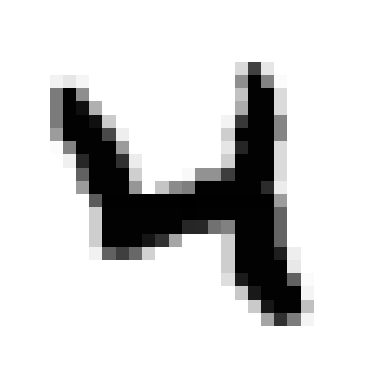

In [4]:
import random
image_sample = X.iloc[20].to_numpy().reshape(28,28)
plt.imshow(image_sample, cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
print(y[20])

4


In [16]:
y = y.astype(np.uint8)

In [17]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

# Train Test Split

In [ ]:
#X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2024)

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a binary classifier

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)

In [20]:
y_train_5.value_counts()

,count
class,
False,54579
True,5421


In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=2024)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=2024)

In [ ]:
sgd_clf.predict([X.iloc[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

# Perforcement Measurement of a binary classifier

## Accuracy (using Cross Validation)

Lets write our own kfold cross validation logic

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def cv_local(X_train, y_train, n_folds  = 3):
  skfold = StratifiedKFold(n_splits=n_folds)
  for train_index, test_index in skfold.split(X_train, y_train):
    local_clf = SGDClassifier(random_state=2024)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train.loc[train_index]

    X_test_folds = X_train.loc[test_index]
    y_test_folds = y_train.loc[test_index]

    local_clf.fit(X_train_folds, y_train_folds)
    y_pred = local_clf.predict(X_test_folds)

    num_correct_pred = sum(y_pred == y_test_folds)
    print("Accuracy : ", (num_correct_pred/len(y_pred))*100)

cv_local(X_train, y_train)


Accuracy :  86.97500000000001
Accuracy :  89.225
Accuracy :  85.89


Lets crossvalidate using cross_val_score

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.9625 , 0.96185, 0.96125])

# Calculating classification metrics

## Confusion Metrics

In [23]:
from sklearn.model_selection import cross_val_predict

y_pred_train = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [41]:
y_pred_test = cross_val_predict(sgd_clf, X_test, y_test_5, cv = 3)

In [27]:
y_pred_train

array([False, False, False, ...,  True, False, False])

Text(77.77777777777779, 0.5, 'Actuals')

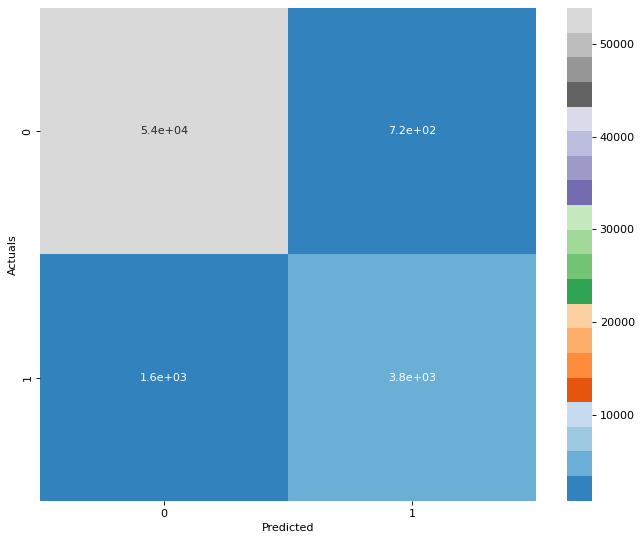

In [35]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 8), dpi=80)
cm = confusion_matrix(y_train_5, y_pred_train)
sns.heatmap(cm, cmap='tab20c', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actuals')

Heatmap when for a perfect model

Text(70.72222222222221, 0.5, 'Actuals')

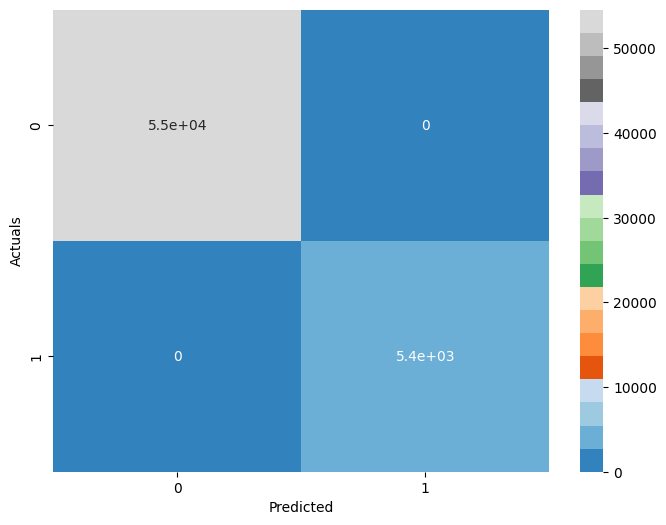

In [39]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train_5, y_train_5)
sns.heatmap(cm, cmap='tab20c', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actuals')

## Precision and Recall

precision = TP/ (TP + FP) <br>

recall = TP / (TP + FN) <br>

With increased threshold boundary, you will increase precision but recall will go down.

In [42]:
from sklearn.metrics import precision_score, recall_score

print("Precision on training data ")
print(precision_score(y_train_5, y_pred_train))

print("Precision on test data ")
print(precision_score(y_test_5, y_pred_test))

Precision on training data 
0.8431544359255203
Precision on test data 
0.8212824010914052


In [43]:
print("Recall on training data ")
print(recall_score(y_train_5, y_pred_train))

print("Recall on test data ")
print(recall_score(y_test_5, y_pred_test))

Recall on training data 
0.710016602102933
Recall on test data 
0.6748878923766816


## F1 score : Harmonic Mean of Precision and Recall

f1_score = 2 * pre * rec / (pre + rec)

In [44]:
precision_train = precision_score(y_train_5, y_pred_train)
recall_train = recall_score(y_train_5, y_pred_train)
f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)

print("F1 train : ",f1_score_train)

F1 train :  0.7708792309232926


In [45]:
precision_test = precision_score(y_test_5, y_pred_test)
recall_test = recall_score(y_test_5, y_pred_test)
f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)

print("F1 train : ",f1_score_test)

F1 train :  0.7409230769230769


In [46]:
# Calculate using sklearn

from sklearn.metrics import f1_score

print(f"f1_score train : {f1_score(y_train_5, y_pred_train)}")
print(f"f1_score test : {f1_score(y_test_5, y_pred_test)}")

f1_score train : 0.7708792309232926
f1_score test : 0.7409230769230769
